In [ ]:
 # Dados _ Penalidades aplicadas a operadoras
    
# Dados processuais e financeiros das penalidades aplicadas a operadoras de planos privados de assistência à saúde e a
# administradoras de benefícios por infrações administrativas às normas regulamentares da Saúde Suplementar.

In [2]:
# importando o pandas
import pandas as pd

In [3]:
# importando pacotes para graficos
import matplotlib.pyplot as plt

In [4]:
from datetime import date

In [5]:
from matplotlib.ticker import FuncFormatter

In [6]:
import seaborn as sns

In [7]:
path = "C:/Users/noturno/Desktop/DATA-SCIENCE-E-BUSINESS-INTELLIGENCE/turma2/datasets/"

In [8]:
df_mark = pd.read_csv(path + 'penalidades_aplicadas_a_operadoras.csv',sep=';', encoding='ISO-8859-1')

In [9]:
df_mark.head()

,NR_DEMANDA,NR_PROCESSO,TIPO_PROCESSO,OBJETO,CD_OPERADORA,CNPJ,RAZAO_SOCIAL,SITUACAO_OPERADORA,STATUS_DEMANDA,DT_DECISAO_1A,...,DE_SITUACAO_GRU,DT_PAGTO_A_VISTA_ANS,VL_PAGO_A_VISTA_ANS,DT_VENC_1A_PARC_ANS,VL_PARCELAS_ANS_PAGAS,STATUS_PARCELAMENTO,DT_INSCRICAO,INSCRITO_DA,ORIGEM_PAGAMENTO,NR_COMPETENCIA_CARGA
0,6041550,33910.024846/2024-15,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Em Cobrança,30/09/2024,...,Pendente,NaN,NaN,NaN,NaN,NaN,NaN,NAO,ANS,202410
1,5423853,33910.013664/2022-49,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Arquivado,05/04/2024,...,Pago,08/05/2024,144000.0,NaN,NaN,NaN,NaN,NAO,ANS,202410
2,5735088,33910.039446/2022-34,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Aguardando Recurso da Operadora,17/09/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAO,NaN,202410
3,395120,33902.163358/2005-51,Consumidor,NaN,359556.0,36.184.695/0001-56,Massa Falida De Policlinica Amhavre Ltda,2.0,Em Cobrança,13/05/2009,...,Pendente,NaN,NaN,NaN,NaN,NaN,05/08/2013,SIM,DA,202410
4,5186750,33910.030421/2021-94,Consumidor,NaN,359017.0,44.649.812/0001-38,Notre Dame Intermédica Saúde S.A.,1.0,Arquivado,20/09/2021,...,Pago,25/10/2021,18000.0,NaN,NaN,NaN,NaN,NAO,ANS,202410


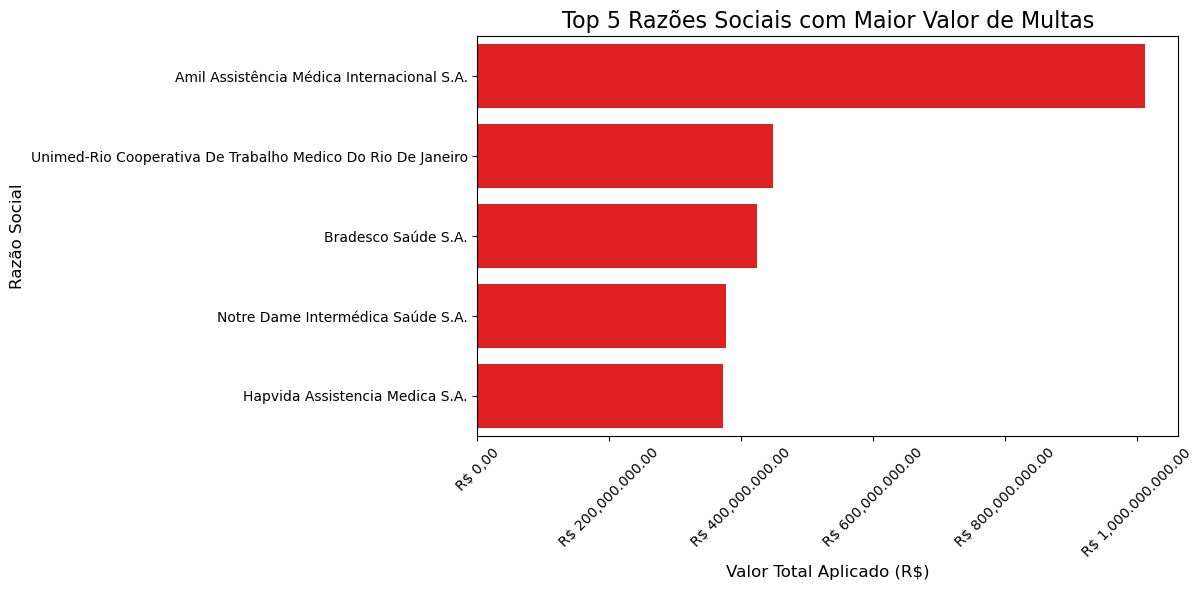

In [68]:
# Agrupando os dados e somando o valor total aplicado por razão social
df_agrupado = df_mark.groupby('RAZAO_SOCIAL')['VL_TOTAL_APLICADO_1A'].sum().reset_index()
df_agrupado = df_agrupado.sort_values(by='VL_TOTAL_APLICADO_1A', ascending=False).head(5)  # Top 5

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    y='RAZAO_SOCIAL', 
    x='VL_TOTAL_APLICADO_1A', 
    data=df_agrupado, 
    color='#FF0000', 
    orient='h'
)

# Formatar valores no eixo X como moeda brasileira
def formatar_moeda(valor, _):
    return f'R$ {valor:,.2f}'.replace(',', '.').replace('.', ',', 1)

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_moeda))

# Configuração dos títulos e rótulos
plt.title('Top 5 Razões Sociais com Maior Valor de Multas', fontsize=16)
plt.xlabel('Valor Total Aplicado (R$)', fontsize=12)
plt.ylabel('Razão Social', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Inclinar os valores do eixo X
plt.xticks(rotation=45)

# Ajustes no layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

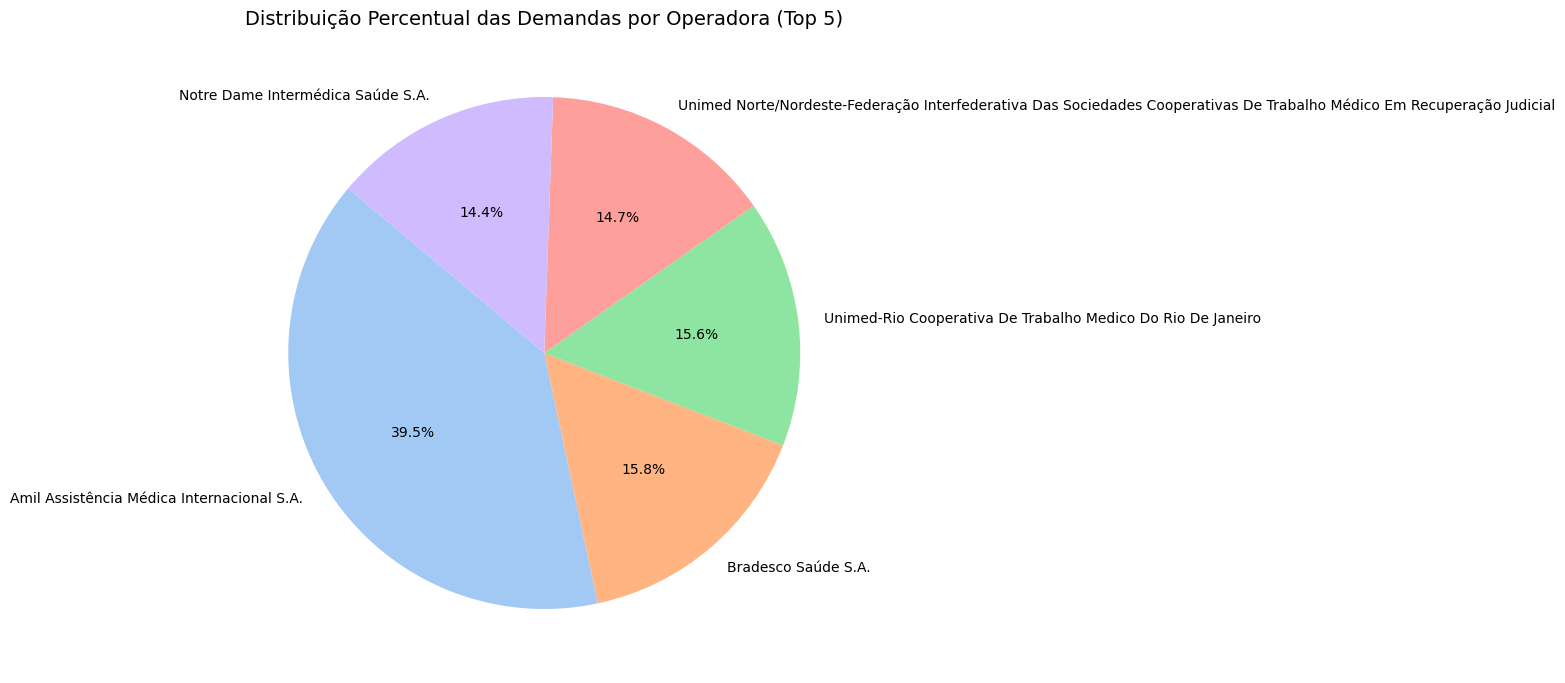

In [11]:
# Contar as demandas por operadora (Top 5)
df_demandas = df_mark['RAZAO_SOCIAL'].value_counts().head(5).reset_index()
df_demandas.columns = ['RAZAO_SOCIAL', 'NR_DEMANDA']

# Criar gráfico de pizza para a distribuição percentual das demandas por operadora
plt.figure(figsize=(8, 8))
cores = sns.color_palette('pastel')  # Paleta de cores suaves
plt.pie(df_demandas['NR_DEMANDA'], labels=df_demandas['RAZAO_SOCIAL'], 
        autopct='%1.1f%%', startangle=140, colors=cores)

# Adicionar título
plt.title('Distribuição Percentual das Demandas por Operadora (Top 5)', fontsize=14)

# Ajustar as margens para garantir que o gráfico caiba completamente
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Exibir gráfico
plt.show()


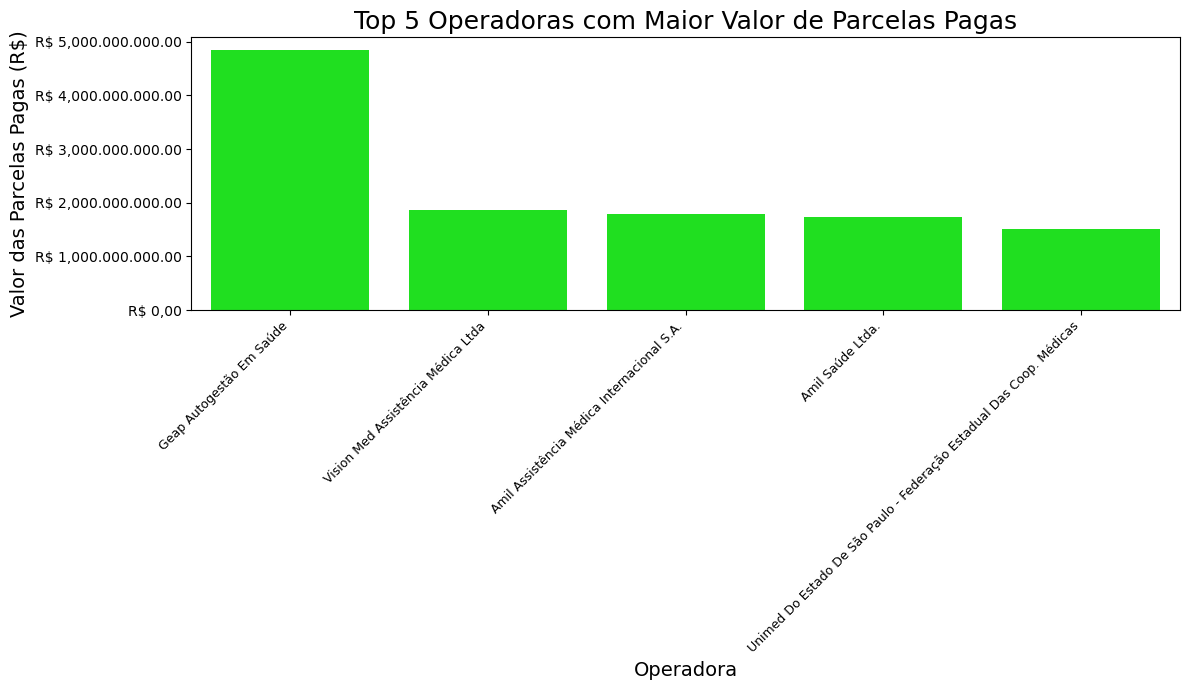

In [74]:
# Top 5 operadoras com maior valor de parcelas pagas
df_top_parcelas = df_mark[['RAZAO_SOCIAL', 'VL_PARCELAS_ANS_PAGAS']].groupby('RAZAO_SOCIAL').sum() \
                   .sort_values(by='VL_PARCELAS_ANS_PAGAS', ascending=False).head(5).reset_index()

# Criar gráfico de barras para o valor de parcelas pagas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='RAZAO_SOCIAL', y='VL_PARCELAS_ANS_PAGAS', data=df_top_parcelas, color='#00FF00')

# Adicionar título e rótulos com fontes maiores
plt.title('Top 5 Operadoras com Maior Valor de Parcelas Pagas', fontsize=18)
plt.xlabel('Operadora', fontsize=14)
plt.ylabel('Valor das Parcelas Pagas (R$)', fontsize=14)

# Formatar valores no eixo Y como moeda
def formatar_moeda_y(valor, _):
    return f'R$ {valor:,.2f}'.replace(',', '.').replace('.', ',', 1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_moeda_y))

# Ajustar os rótulos do eixo X para evitar sobreposição e aumentar a visibilidade
plt.xticks(rotation=45, ha='right', fontsize=9)

# Ajustar o layout para garantir que todos os elementos caibam
plt.tight_layout()

# Exibir gráfico
plt.show()


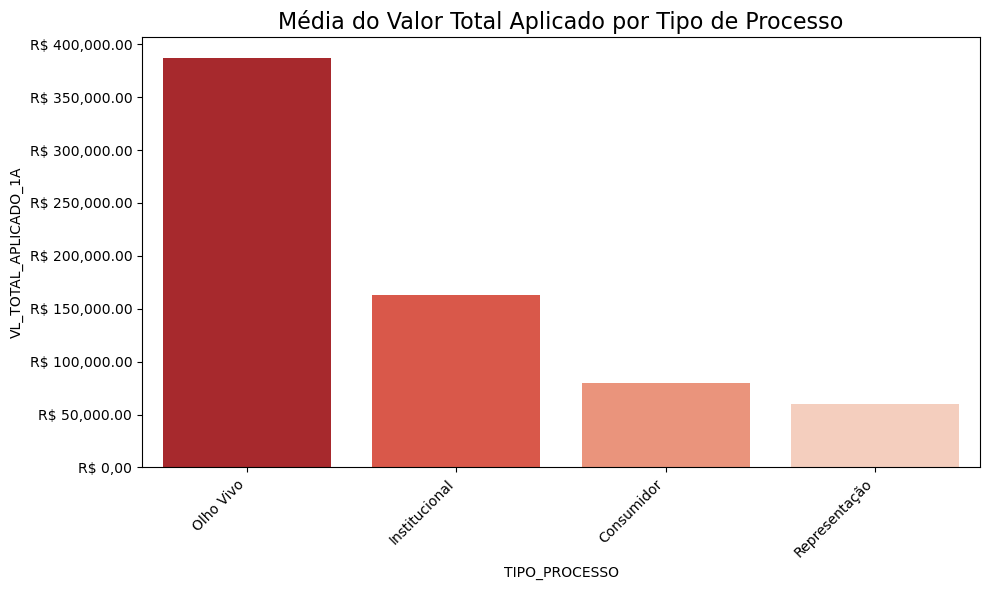

In [104]:
# Calcular a média do valor total aplicado por tipo de processo
df_media_tipo = df_mark[['TIPO_PROCESSO', 'VL_TOTAL_APLICADO_1A']].groupby('TIPO_PROCESSO').mean().sort_values(by='VL_TOTAL_APLICADO_1A', ascending=False).reset_index()

# Criar gráfico de barras com gradiente de cores (paleta "Reds_r" invertida)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='TIPO_PROCESSO', 
    y='VL_TOTAL_APLICADO_1A', 
    data=df_media_tipo, 
    hue='TIPO_PROCESSO',  # Usando hue para colorir com base em 'TIPO_PROCESSO'
    palette='Reds_r',      # Usando a paleta "Reds_r" para inverter as cores
    legend=False           # Desativando a legenda
)

# Adicionar título
plt.title('Média do Valor Total Aplicado por Tipo de Processo', fontsize=16)

# Formatar valores no eixo Y como moeda
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', '.').replace('.', ',', 1)))

# Ajustar os rótulos do eixo X e layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Exibir gráfico
plt.show()

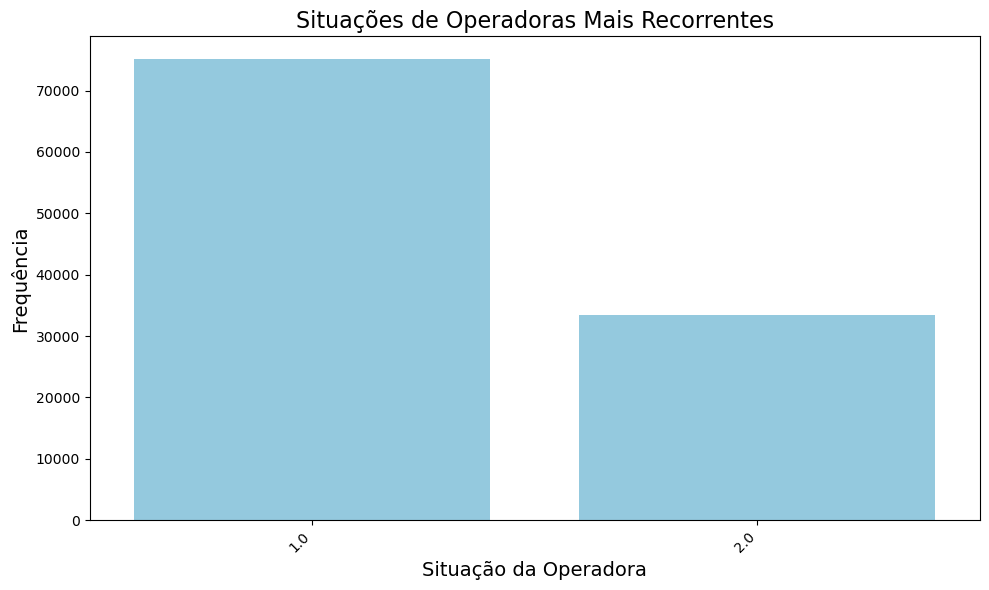

In [105]:
# Contar as situações mais recorrentes
df_situacoes = df_mark['SITUACAO_OPERADORA'].value_counts().head(5).reset_index()
df_situacoes.columns = ['SITUACAO_OPERADORA', 'FREQUENCIA']

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='SITUACAO_OPERADORA', y='FREQUENCIA', data=df_situacoes, color='skyblue')

# Adicionar título e rótulos com fontes maiores
plt.title('Situações de Operadoras Mais Recorrentes', fontsize=16)
plt.xlabel('Situação da Operadora', fontsize=14)
plt.ylabel('Frequência', fontsize=14)


# Ajustar os rótulos do eixo X para evitar sobreposição e aumentar a visibilidade
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajustar o layout para garantir que todos os elementos caibam
plt.tight_layout()

# Exibir gráfico
plt.show()

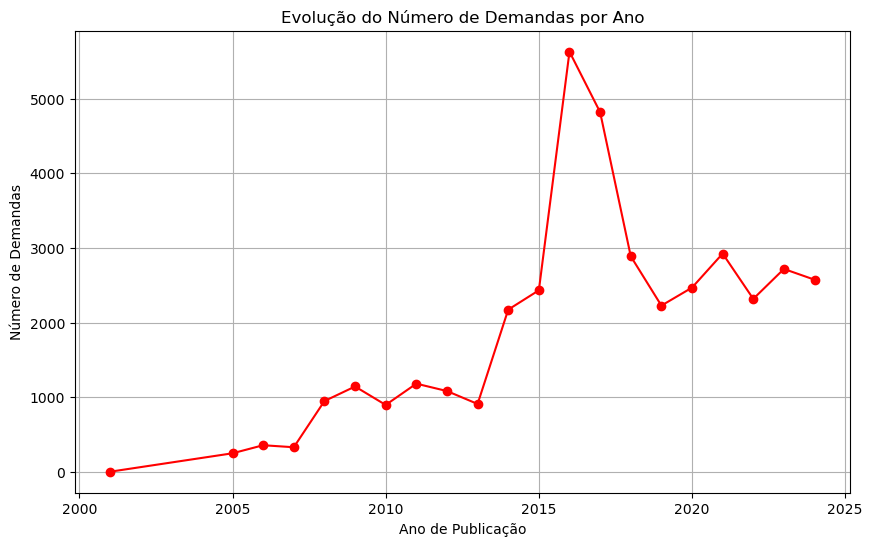

In [15]:
# Gráfico 1: Evolução do número de demandas ao longo do tempo (DT_PUBLICACAO_1A)
df_mark['DT_PUBLICACAO_1A'] = pd.to_datetime(df_mark['DT_PUBLICACAO_1A'], errors='coerce')
df_mark['Ano_Publicacao'] = df_mark['DT_PUBLICACAO_1A'].dt.year
plt.figure(figsize=(10, 6))
df_mark['Ano_Publicacao'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title('Evolução do Número de Demandas por Ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Demandas')
plt.grid(True)
plt.show()

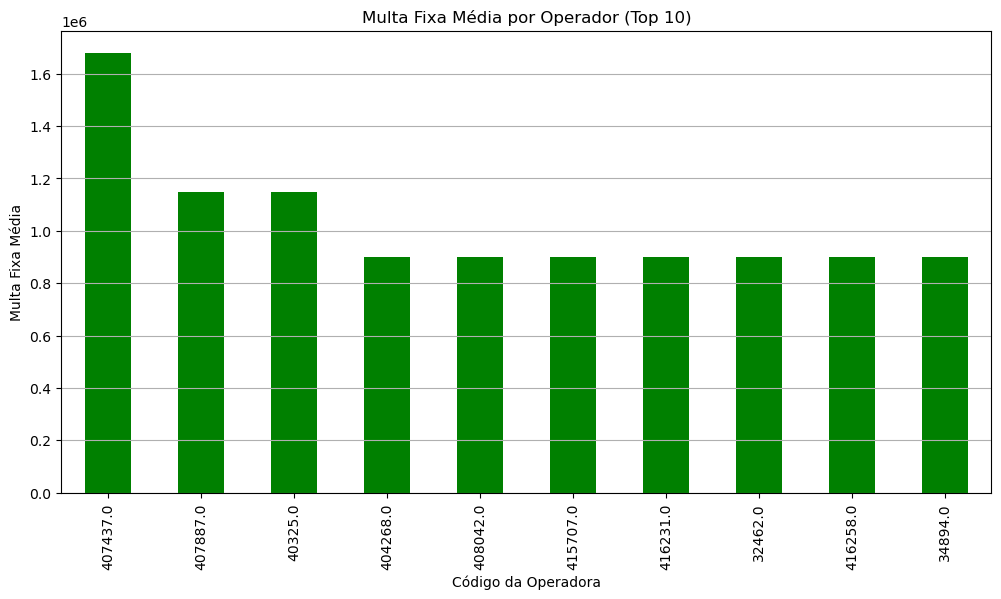

In [16]:
# Gráfico 2: Multa fixa média por operador (CD_OPERADORA)
plt.figure(figsize=(12, 6))
df_mark.groupby('CD_OPERADORA')['VL_MULTA_FIXA_1A'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Multa Fixa Média por Operador (Top 10)')
plt.xlabel('Código da Operadora')
plt.ylabel('Multa Fixa Média')
plt.grid(axis='y')
plt.show()

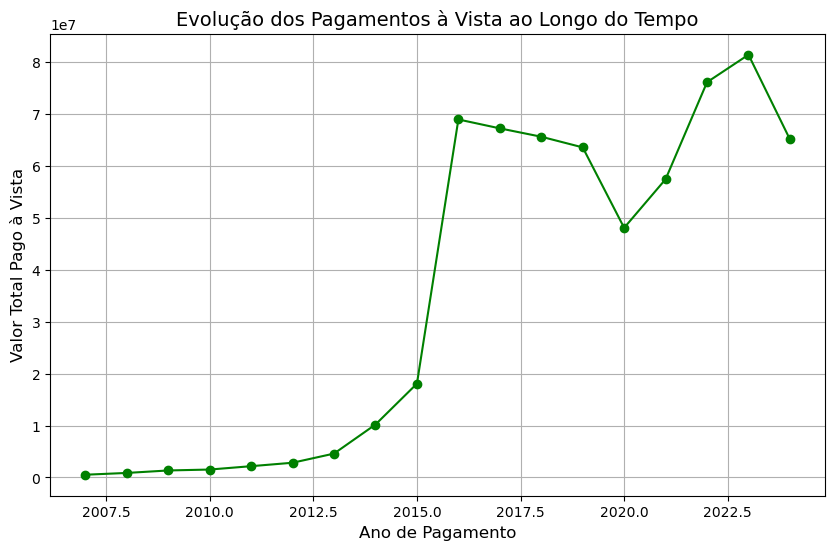

In [17]:
# Gráfico 3: Evolução de Pagamentos à Vista ao Longo do Tempo
df_mark['DT_PAGTO_A_VISTA_ANS'] = pd.to_datetime(df_mark['DT_PAGTO_A_VISTA_ANS'], errors='coerce')
df_mark['ANO_PAGAMENTO'] = df_mark['DT_PAGTO_A_VISTA_ANS'].dt.year

pagamentos_ano = df_mark.groupby('ANO_PAGAMENTO')['VL_PAGO_A_VISTA_ANS'].sum()

plt.figure(figsize=(10, 6))
pagamentos_ano.plot(kind='line', marker='o', color='green')
plt.title('Evolução dos Pagamentos à Vista ao Longo do Tempo', fontsize=14)
plt.xlabel('Ano de Pagamento', fontsize=12)
plt.ylabel('Valor Total Pago à Vista', fontsize=12)
plt.grid(True)
plt.show()

C:\Users\noturno\AppData\Local\Temp\ipykernel_10900\3869791588.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_mark['DT_DECISAO_1A'] = pd.to_datetime(df_mark['DT_DECISAO_1A'], errors='coerce')


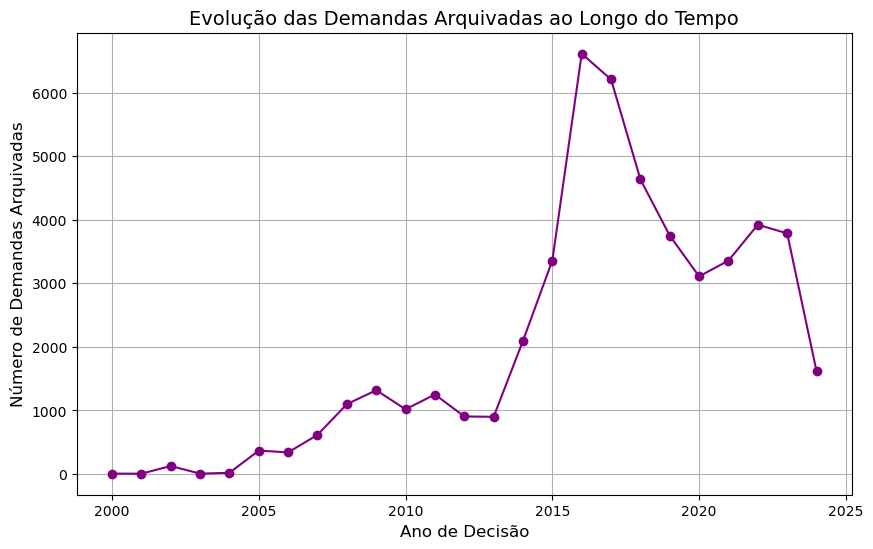

In [18]:
# Gráfico 4: Evolução de Demandas Arquivadas ao Longo do Tempo
df_mark['DT_DECISAO_1A'] = pd.to_datetime(df_mark['DT_DECISAO_1A'], errors='coerce')
df_mark['ANO_DECISAO'] = df_mark['DT_DECISAO_1A'].dt.year

arquivadas = df_mark[df_mark['STATUS_DEMANDA'] == 'Arquivado']
arquivadas_por_ano = arquivadas.groupby('ANO_DECISAO')['NR_DEMANDA'].count()

plt.figure(figsize=(10, 6))
arquivadas_por_ano.plot(kind='line', marker='o', color='purple')
plt.title('Evolução das Demandas Arquivadas ao Longo do Tempo', fontsize=14)
plt.xlabel('Ano de Decisão', fontsize=12)
plt.ylabel('Número de Demandas Arquivadas', fontsize=12)
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

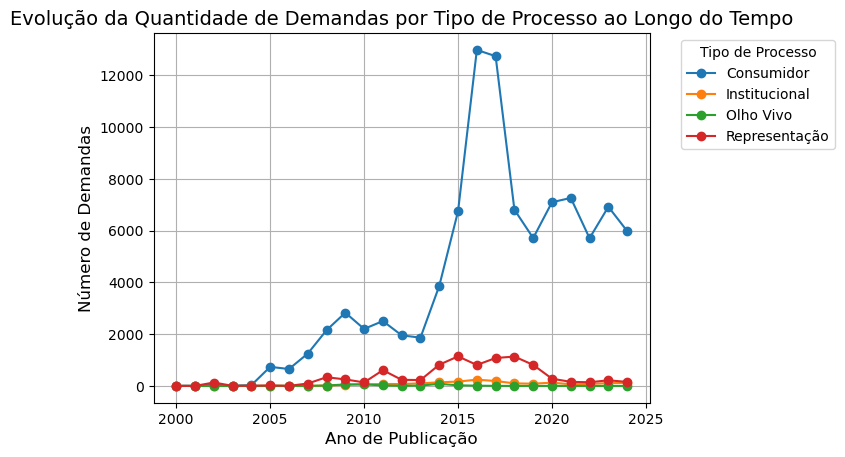

In [19]:
#Grafio 5:  Evolução da Quantidade de Demandas por Tipo de Processo
tipo_processo_por_ano = df_mark.groupby(['ANO_DECISAO', 'TIPO_PROCESSO']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
tipo_processo_por_ano.plot(kind='line', marker='o')
plt.title('Evolução da Quantidade de Demandas por Tipo de Processo ao Longo do Tempo', fontsize=14)
plt.xlabel('Ano de Publicação', fontsize=12)
plt.ylabel('Número de Demandas', fontsize=12)
plt.legend(title='Tipo de Processo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [20]:
#graficos luan

C:\Users\noturno\AppData\Local\Temp\ipykernel_10900\3470001733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TIPO_PROCESSO', y='NUM_DEMANDAS', data=df_demandas_tipo, palette='Set1')


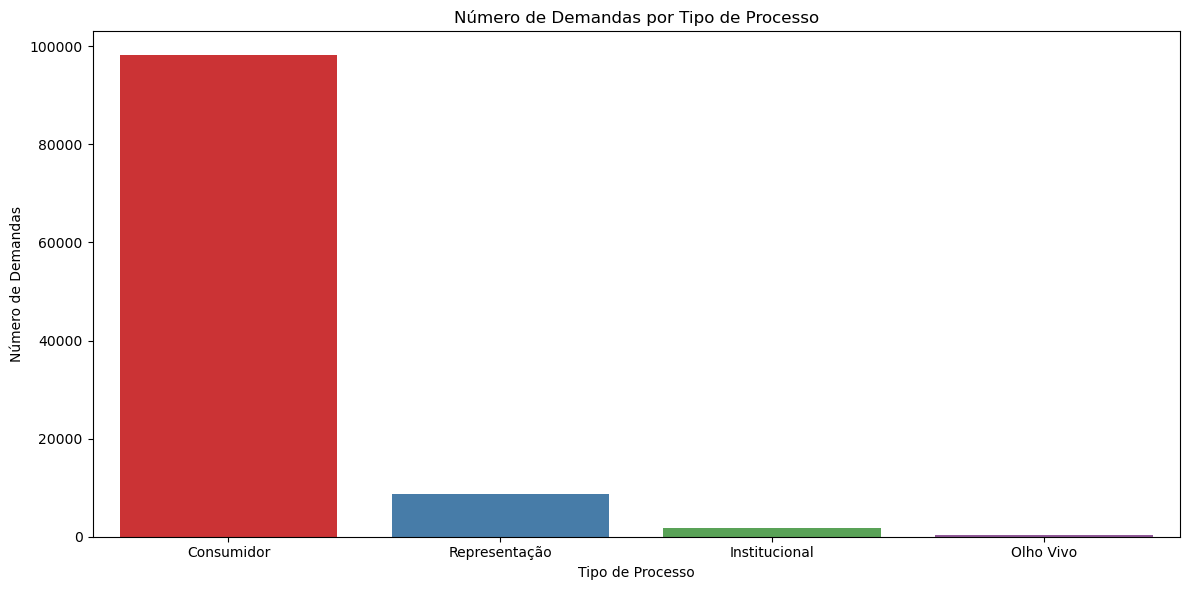

In [22]:
df_demandas_tipo = df_mark['TIPO_PROCESSO'].value_counts().reset_index()
df_demandas_tipo.columns = ['TIPO_PROCESSO', 'NUM_DEMANDAS']

plt.figure(figsize=(12, 6))
sns.barplot(x='TIPO_PROCESSO', y='NUM_DEMANDAS', data=df_demandas_tipo, palette='Set1')
plt.title('Número de Demandas por Tipo de Processo')
plt.xlabel('Tipo de Processo')
plt.ylabel('Número de Demandas')
plt.tight_layout()
plt.show()

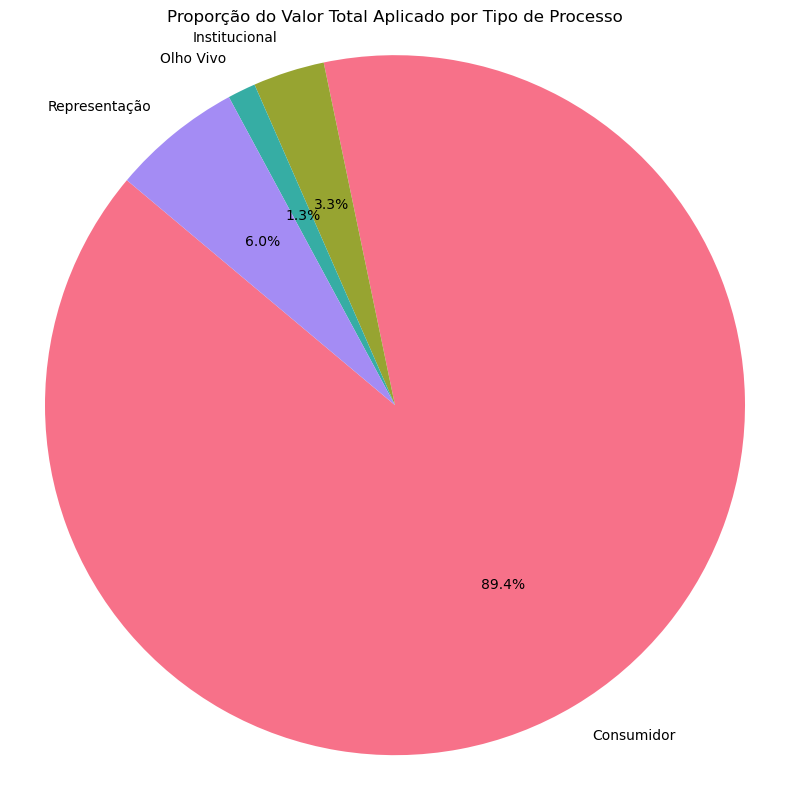

In [23]:
df_valor_total = df_mark.groupby('TIPO_PROCESSO')['VL_TOTAL_APLICADO_1A'].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_valor_total, labels=df_valor_total.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', len(df_valor_total)))
plt.title('Proporção do Valor Total Aplicado por Tipo de Processo')
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\noturno\AppData\Local\Temp\ipykernel_10900\186464594.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TIPO_PROCESSO', y='VL_PARCELAS_ANS_PAGAS', data=df_parcelas_tipo, palette='viridis')


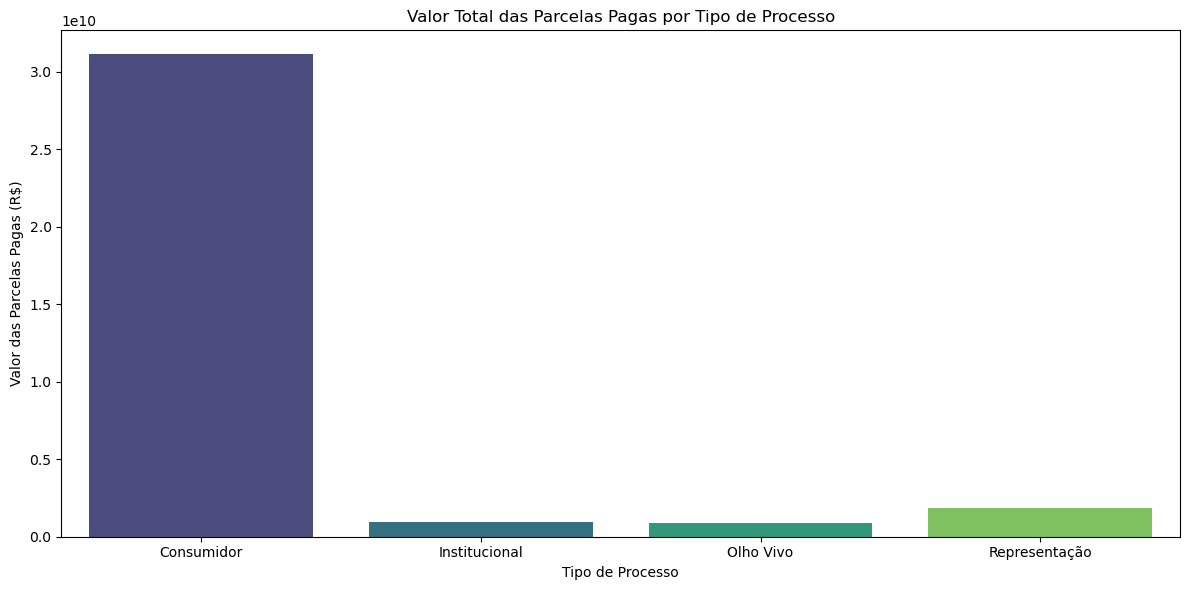

In [24]:
df_parcelas_tipo = df_mark.groupby('TIPO_PROCESSO')['VL_PARCELAS_ANS_PAGAS'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TIPO_PROCESSO', y='VL_PARCELAS_ANS_PAGAS', data=df_parcelas_tipo, palette='viridis')
plt.title('Valor Total das Parcelas Pagas por Tipo de Processo')
plt.xlabel('Tipo de Processo')
plt.ylabel('Valor das Parcelas Pagas (R$)')
plt.tight_layout()
plt.show()

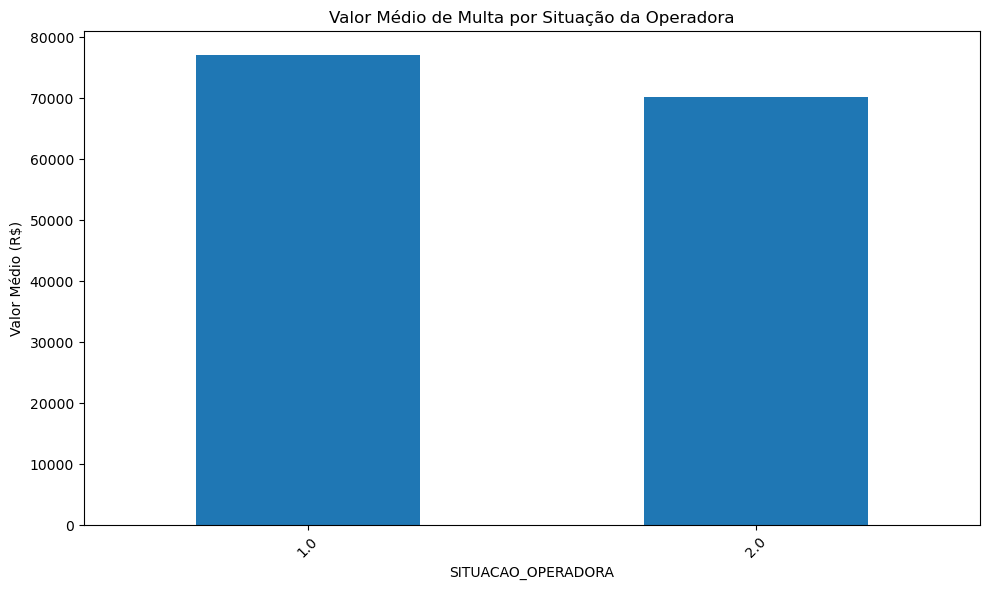

In [26]:
# 2. Gráfico de valores médios de multa por situação da operadora
plt.figure(figsize=(10, 6))
df_mark.groupby('SITUACAO_OPERADORA')['VL_MULTA_FINAL_APLICADA'].mean().plot(kind='bar')
plt.title('Valor Médio de Multa por Situação da Operadora')
plt.ylabel('Valor Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

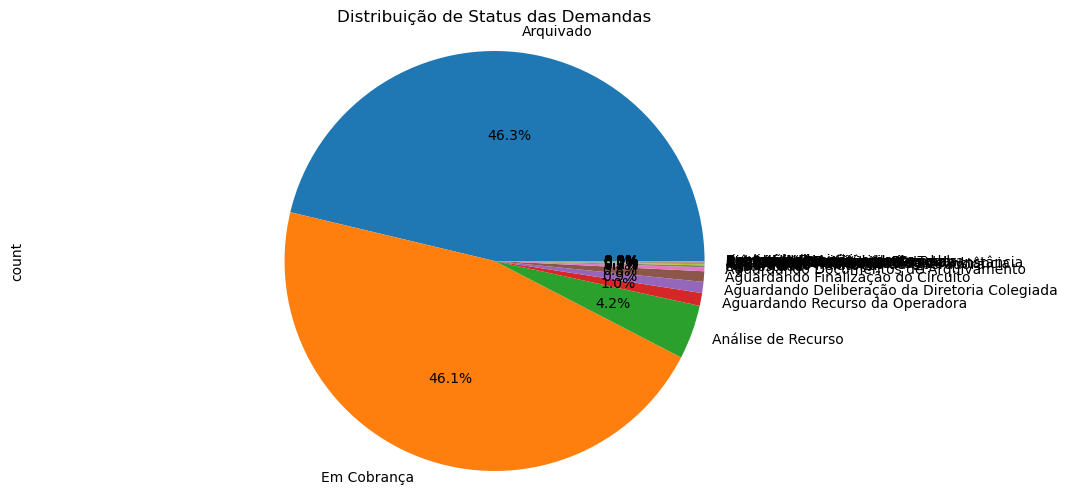

In [27]:
# 3. Gráfico de status das demandas
plt.figure(figsize=(12, 6))
df_mark['STATUS_DEMANDA'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Status das Demandas')
plt.axis('equal')
plt.show()

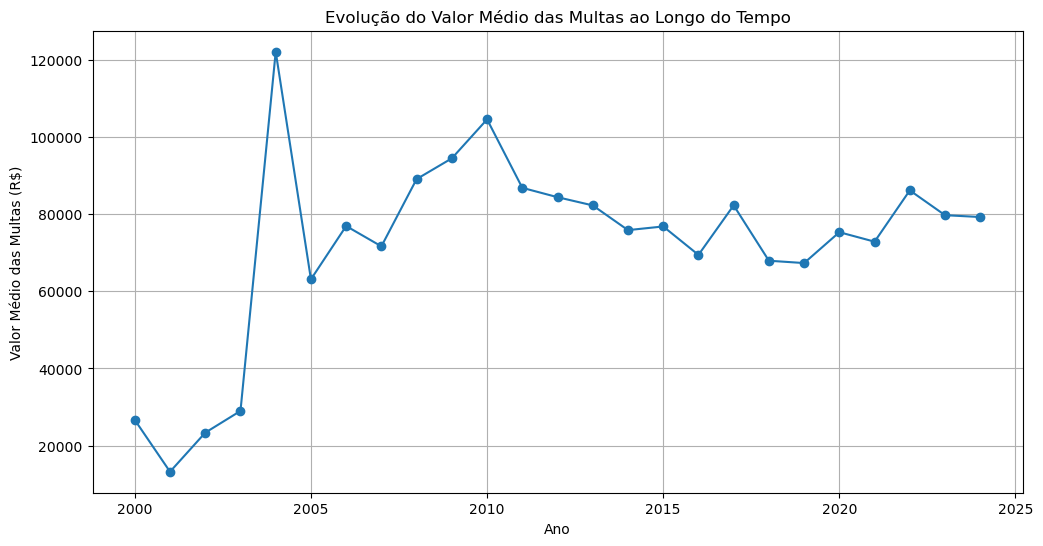

In [28]:
# 4. Gráfico de linha temporal de multas
df_mark['DT_DECISAO_1A'] = pd.to_datetime(df_mark['DT_DECISAO_1A'], format='%d/%m/%Y', errors='coerce')
multas_tempo = df_mark.groupby(df_mark['DT_DECISAO_1A'].dt.year)['VL_MULTA_FINAL_APLICADA'].mean()
plt.figure(figsize=(12, 6))
multas_tempo.plot(kind='line', marker='o')
plt.title('Evolução do Valor Médio das Multas ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Valor Médio das Multas (R$)')
plt.grid(True)
plt.show()